<a href="https://colab.research.google.com/github/pratip4/crypto_is_fun/blob/main/lending_club_loan_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/datasets/loan_data.csv')
df.head()

Mounted at /content/drive


credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
pur_encoded = encoder.fit_transform(df[['purpose']]).toarray()
category_labels = encoder.categories_[0]
new_columns = [f'purpose_{label}' for label in category_labels]
df_purpose_encoded = pd.DataFrame(pur_encoded, columns=new_columns)
df_purpose_encoded = pd.concat([df, df_purpose_encoded], axis=1)
df_purpose_clean = df_purpose_encoded.drop('purpose', axis=1)
df_purpose_clean.head()

df_tr = df_purpose_clean


In [ ]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

In [ ]:
# generating sweetviz report for holistic analysis of the data.
!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(df_tr)
sweet_report.show_html('lending_club_sweet_report.html')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 50.1 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report lending_club_sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


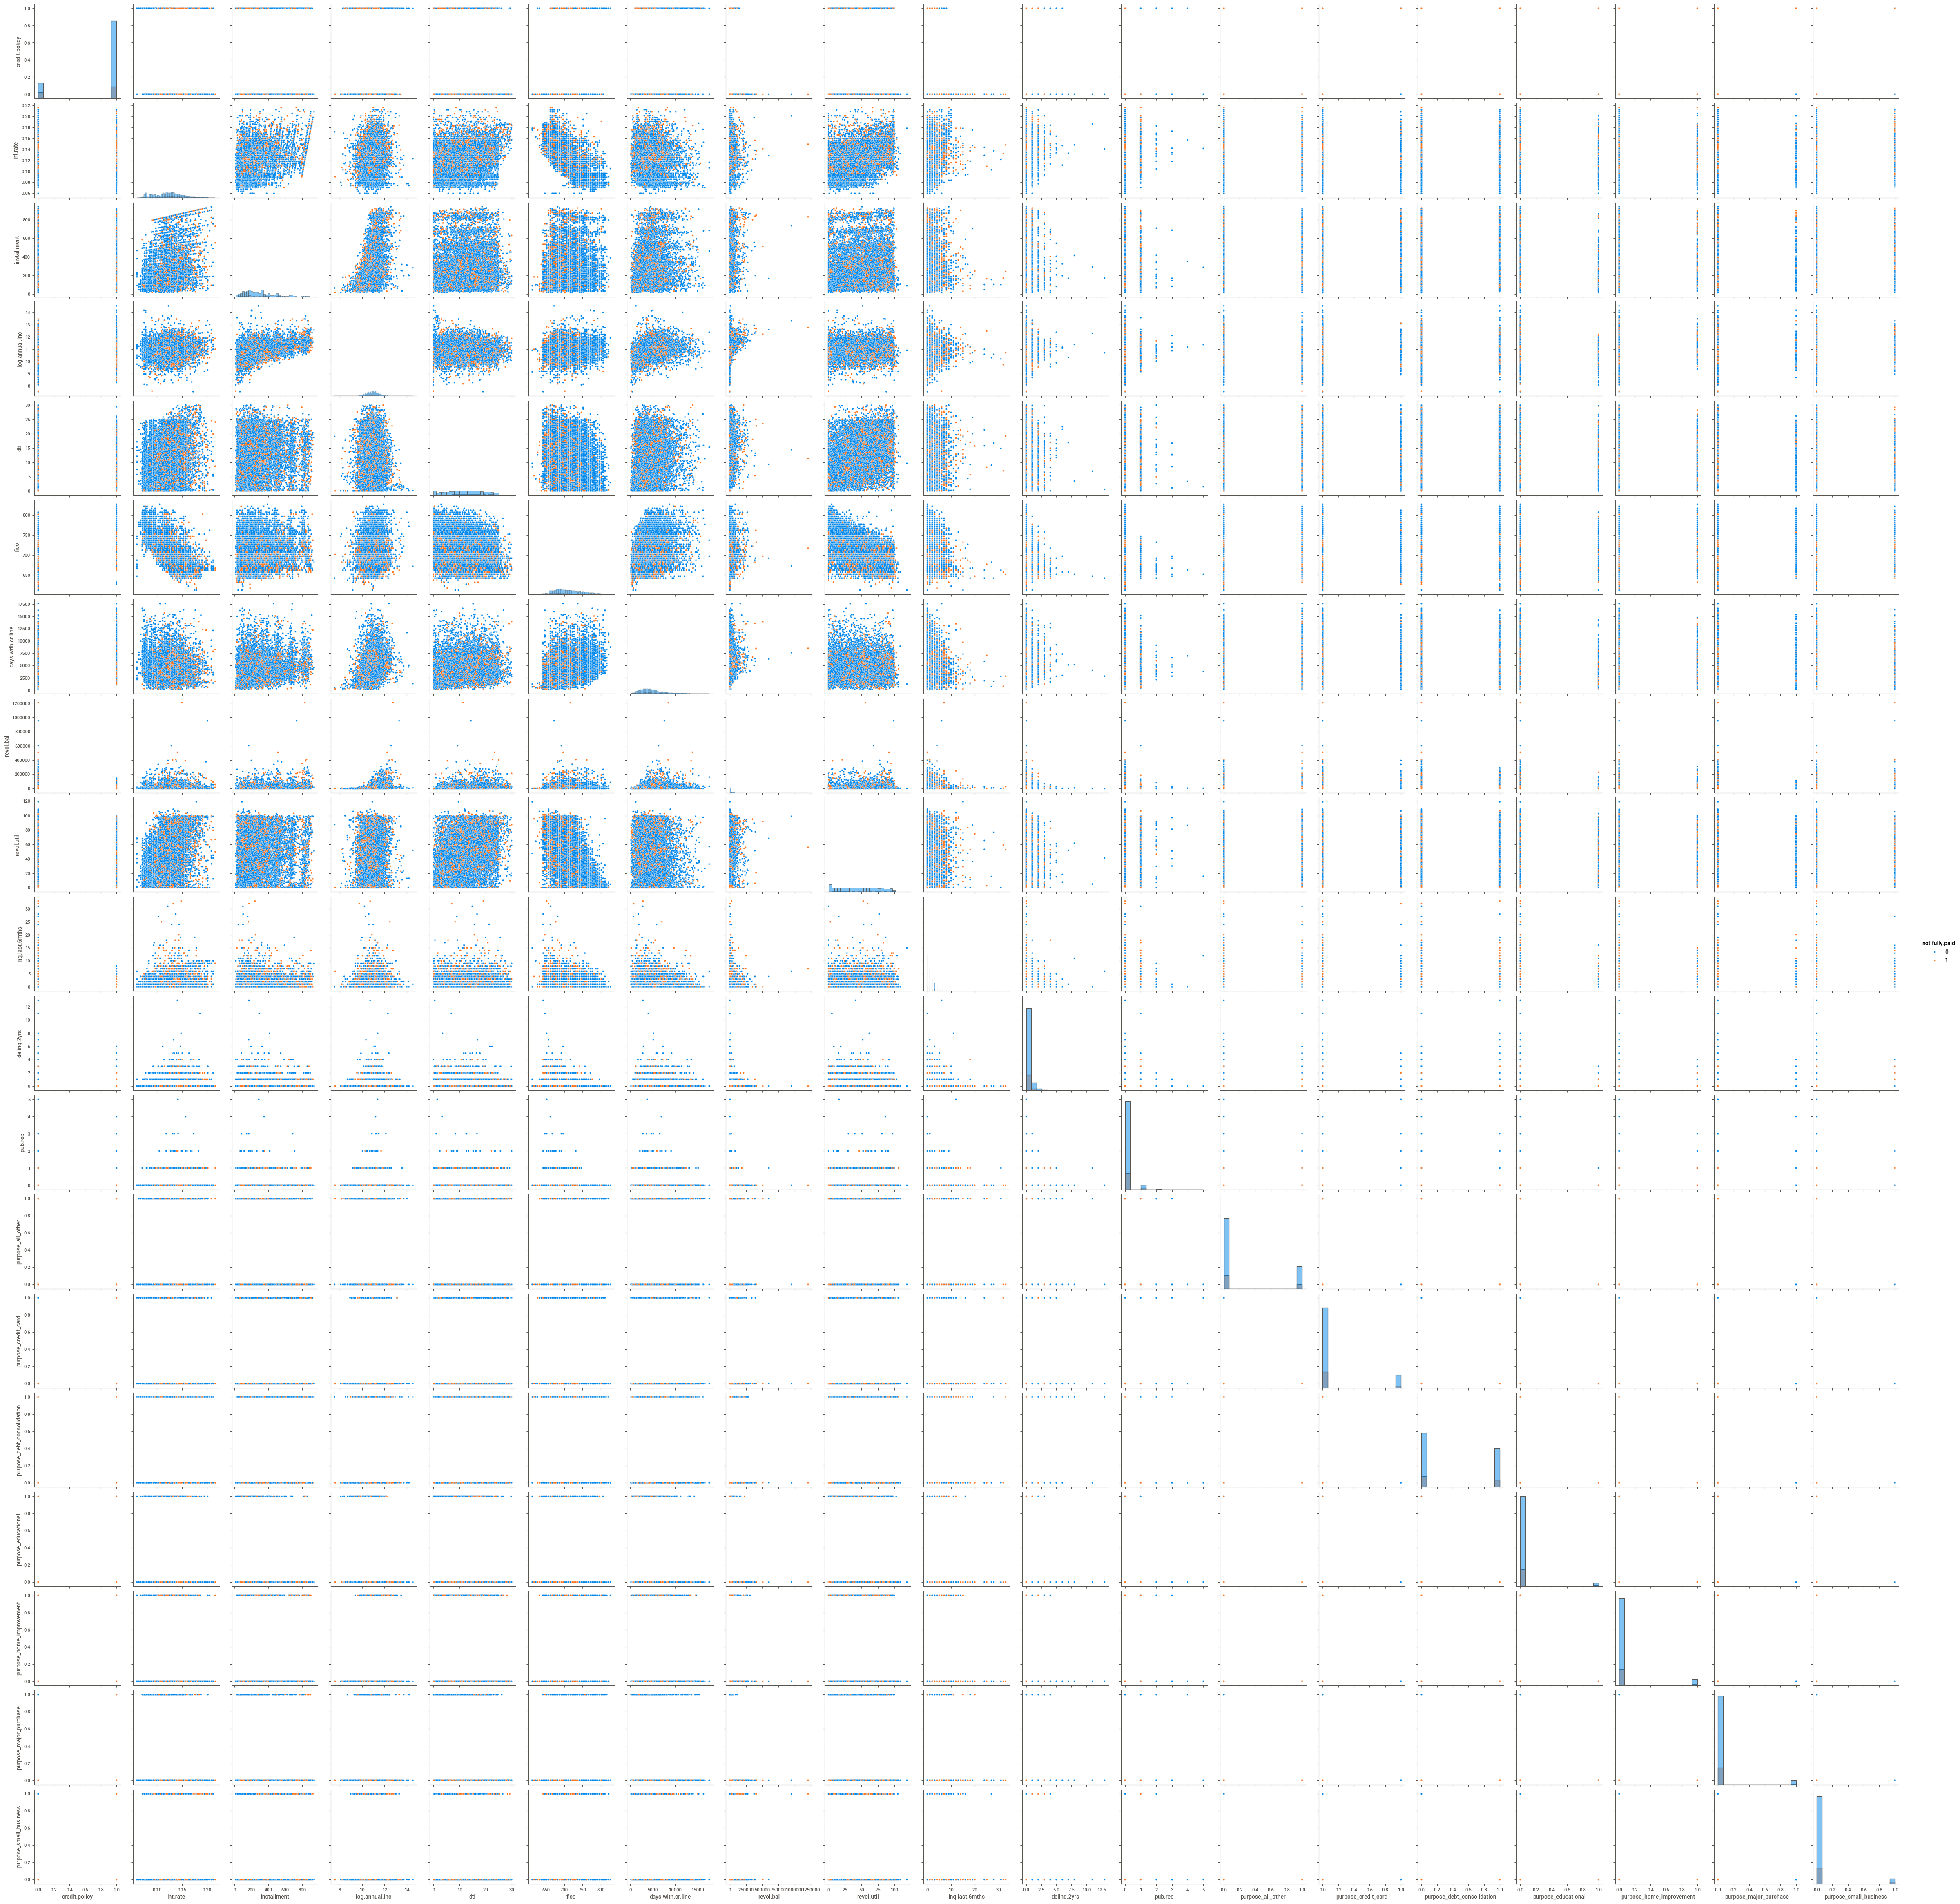

In [ ]:
# creating a pair plot to look at correlation
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(df_tr,diag_kind='hist',hue="not.fully.paid")

In [5]:
from sklearn.model_selection import train_test_split
X = df_tr.drop('not.fully.paid', axis=1)
y = df_tr['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Building the Model

In [6]:
# Import the necessary module
from tensorflow.keras import layers
import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential()

# Reshape the input data
model.add(layers.Reshape((19,)))

# Normalize the data
model.add(layers.BatchNormalization())

# Build the Graph

In [7]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(2000))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

In [8]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(1000))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

In [9]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(600))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU())


In [10]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(300))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

In [11]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [12]:
#Create optimizer with non-default learning rate
adam_op = tf.keras.optimizers.Adam(lr=0.05)
#Compile the model
model.compile(optimizer=adam_op, loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs=20,
          batch_size=32)

Epoch 1/20
240/240 [==============================] - 9s 11ms/step - loss: 0.5236 - accuracy: 0.7856 - val_loss: 0.4558 - val_accuracy: 0.8314
Epoch 2/20
240/240 [==============================] - 3s 11ms/step - loss: 0.4323 - accuracy: 0.8349 - val_loss: 0.4306 - val_accuracy: 0.8319
Epoch 3/20
240/240 [==============================] - 2s 7ms/step - loss: 0.4248 - accuracy: 0.8356 - val_loss: 0.4435 - val_accuracy: 0.8314
Epoch 4/20
240/240 [==============================] - 2s 7ms/step - loss: 0.4187 - accuracy: 0.8412 - val_loss: 0.4366 - val_accuracy: 0.8340
Epoch 5/20
240/240 [==============================] - 2s 7ms/step - loss: 0.4151 - accuracy: 0.8406 - val_loss: 0.4336 - val_accuracy: 0.8314
Epoch 6/20
240/240 [==============================] - 2s 7ms/step - loss: 0.4164 - accuracy: 0.8406 - val_loss: 0.4319 - val_accuracy: 0.8319
Epoch 7/20
240/240 [==============================] - 2s 8ms/step - loss: 0.4155 - accuracy: 0.8410 - val_loss: 0.4328 - val_accuracy: 0.8314
Epoc

## Model Prediction

In [14]:
#Predict
import numpy as np

# Import the confusion_matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Convert y_test to a 2D array
y_test = np.expand_dims(y_test, axis=1)

y_prediction = model.predict(X_test)
# y_prediction = np.argmax (y_prediction, axis = 1)
# y_test=np.argmax(y_test, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction , normalize='pred')
print(result)

60/60 [==============================] - 0s 3ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets